In [592]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit.visualization import plot_histogram
from ham import *
from tqdm import tqdm_notebook as tqdm
from celluloid import Camera
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:


a=1;n=4
for a in [0.1,1,10,100,1000]:
    fig,ax=plt.subplots(facecolor="w")
    camera = Camera(fig)
    for ntimes in tqdm(range(1,40,3)):
        h=ham(5,start_sigma=.5,start_mu=0,ntimes=ntimes)
        h.set_V(a*(h.x+0)**n)
        h.make_ham()
        h.simulate()

        h.plot_potential(ax=ax)
        plot_histogram([h.result,h.initial],bar_labels=False,ax=ax)
        ax.text(0.2, 0.7, f'Time step = {ntimes}', transform=ax.transAxes)
        ax.set_title(f"V(x)=${a}x^{n}$ potential")
        ax.set_xticklabels(h.x, fontsize=10)
        plt.legend()
        ax.grid(False)
        camera.snap()
    from IPython.display import HTML
    animation = camera.animate()
    fname=f"{a}*x^{n}.gif"
    animation.save(f'figs/{fname}')
    plt.close()

    print(f"done {a}")


done 0.1



done 1



done 10



done 100



done 1000


In [106]:
from IPython.display import HTML
# HTML(f'<img src="figs/{fname}">')

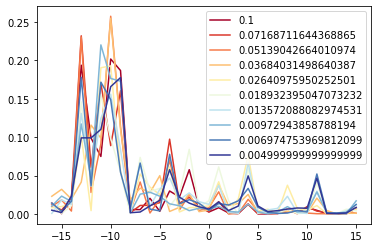

In [545]:
h=ham(5,start_sigma=1,start_mu=-10)
h.set_V(h.x**2 * 90)

r=[]
T=1
DT=np.geomspace(.1, .005, num=10)
for i in tqdm(DT):
    r.append(h.get_result(T=T,dt=i))
colors = plt.cm.RdYlBu(np.linspace(0,1,len(DT)))
for j,i in enumerate (r):
    plt.plot(h.x,i,label=DT[j],c=colors[j])
plt.legend()

In [779]:
r=[]
xmin=-1
xmax=1
h=ham(5,start_sigma=.1,start_mu=-.1,start_p0=0,xmin=xmin,xmax=xmax)
h.set_V(h.x*0)
T=np.linspace(0,2,20)
for i in tqdm(T):
    r.append(h.get_result(T=i,dt=.1))

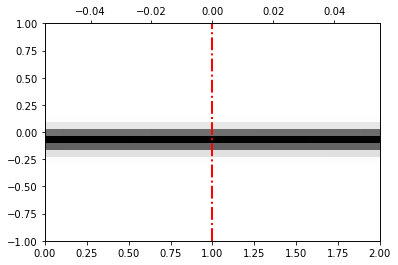

In [780]:
fig,ax=plt.subplots()
ax.pcolormesh(T,h.x,np.array(r).T,cmap="Greys")
ax1=ax.twiny()
ax1.plot(h.v,h.x,c="r",ls="-.",lw=2)